<a href="https://colab.research.google.com/github/thiagoteles10/producao-de-veiculos-series-temporais/blob/main/Produ%C3%A7%C3%A3o_de_ve%C3%ADculos(s%C3%A9ries_temporais).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas + funções

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pytz
import missingno

# Avaliação
### Análise da série temporal: Produção de veículos automotores no Brasil

In [2]:
df = pd.read_csv('bcdata.sgs.1373.csv', sep=';')

In [3]:
df.head()

,data,valor
0,01/01/1993,66168
1,01/02/1993,73042
2,01/03/1993,98691
3,01/04/1993,88839
4,01/05/1993,101055


In [4]:
df.tail()

,data,valor
353,01/06/2022,203598
354,01/07/2022,218950
355,01/08/2022,237961
356,01/09/2022,207762
357,01/10/2022,206044


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    358 non-null    object
 1   valor   358 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


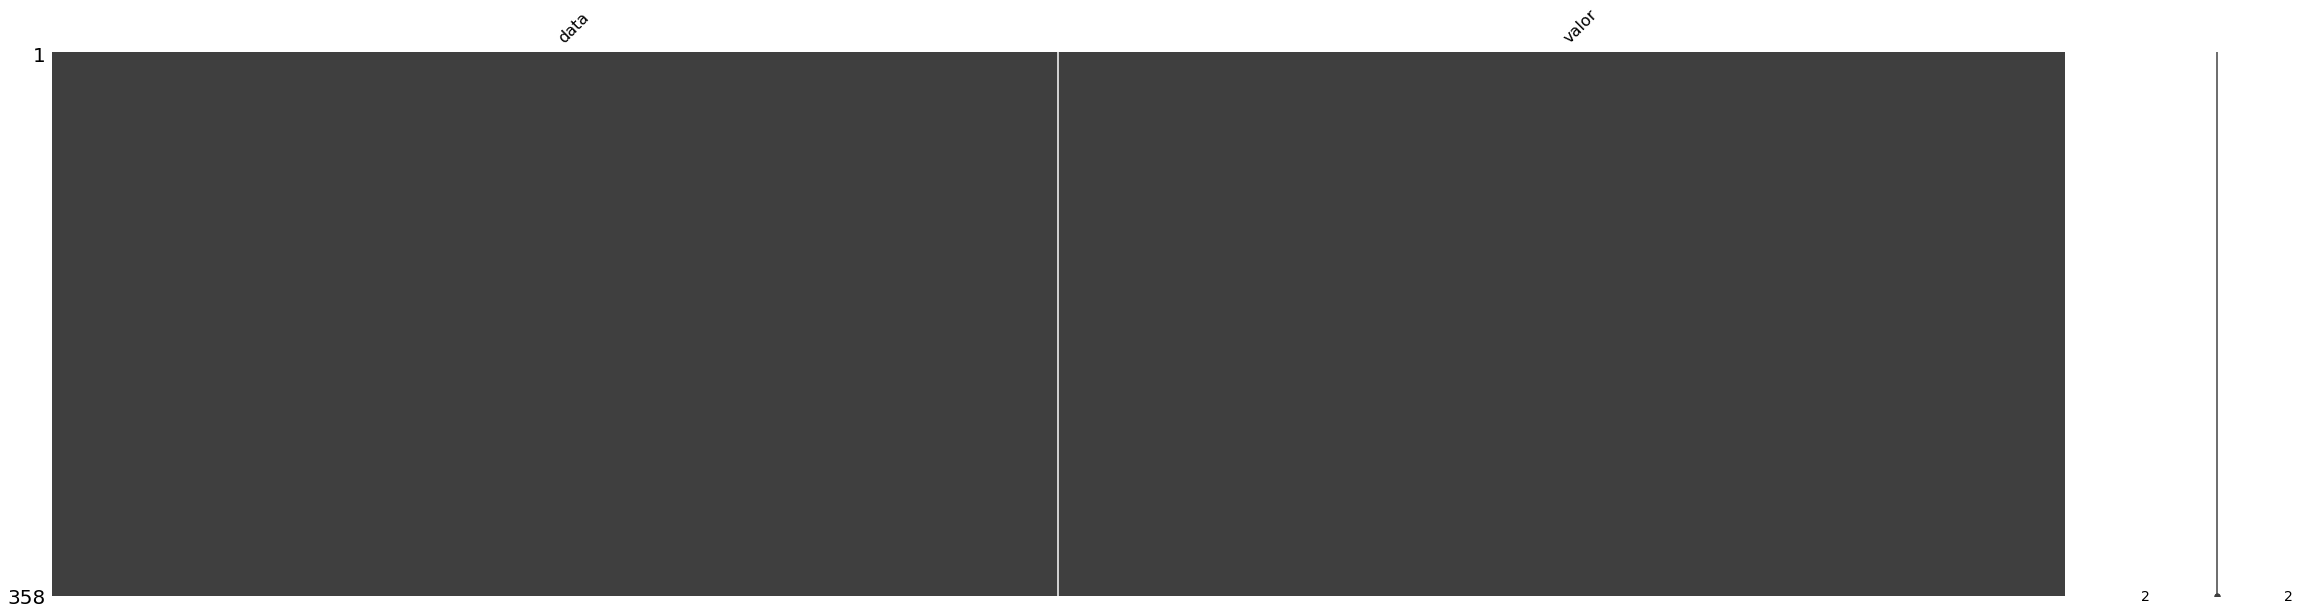

In [6]:
# Verificando dados faltantes
missingno.matrix(df, figsize=(40,10));

Não existem dados faltantes no data frame analisado

## Duplicatas

In [7]:
df[df.duplicated()]

,data,valor


Não há valores duplicados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    358 non-null    object
 1   valor   358 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [9]:
# transformando a data de object para datetime
df['data'] = pd.to_datetime(df['data'])

In [10]:
df.dtypes

data     datetime64[ns]
valor             int64
dtype: object

In [11]:
df.describe()

,valor
count,358.000000
mean,192897.740223
std,67523.934261
min,1847.000000
25%,136095.000000
50%,190028.500000
75%,244139.000000
max,352328.000000


In [12]:
# transformando Data em index
df.set_index('data', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358 entries, 1993-01-01 to 2022-01-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   valor   358 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


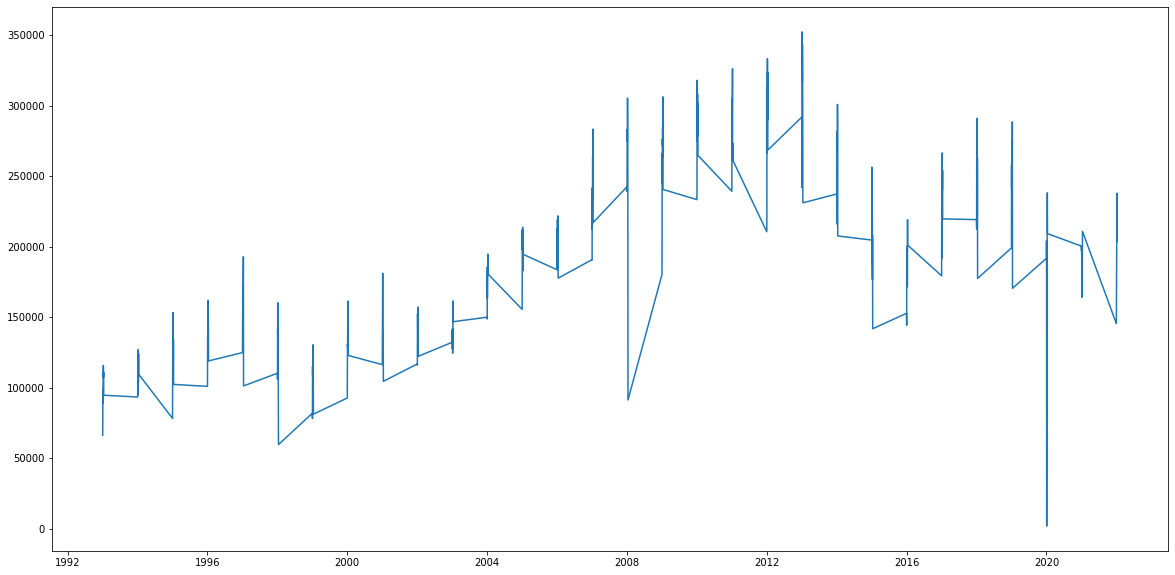

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df);
 


### Notamos no gráfico acima que no ano de 2008 tivemos uma queda muito significativa, provavelmente devido a crise mundial e no ano de 2020 devido ao início da pandemia de covid.


### Faça a nálise da estacionaridade (ADFULLER) para os seguintes períodos:


*   Bimestral
*   Trimestral
Para isso fazer o RESAMPLE



## Período Bimestral 

In [15]:
# fazendo a média dos valores bimestrais
bimestral = df.resample('2M').mean()
bimestral.head()

,valor
data,
1993-01-31,97775.0
1993-03-31,NaN
1993-05-31,NaN
1993-07-31,NaN
1993-09-30,NaN


## Período Trimestral

In [16]:
# fazendo a média dos valores trimestral
trimestral = df.resample('Q').mean()
trimestral.head()

,valor
data,
1993-03-31,97775.000000
1993-06-30,NaN
1993-09-30,NaN
1993-12-31,NaN
1994-03-31,110140.916667


## Análise de sazonalidade

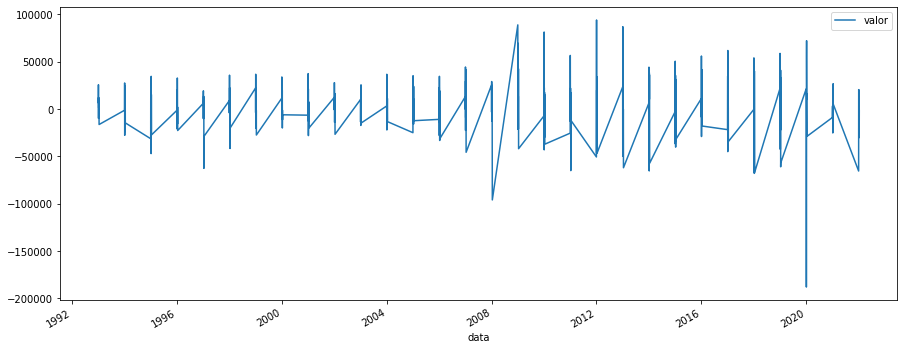

In [17]:
df.diff().plot(figsize=(15,6));

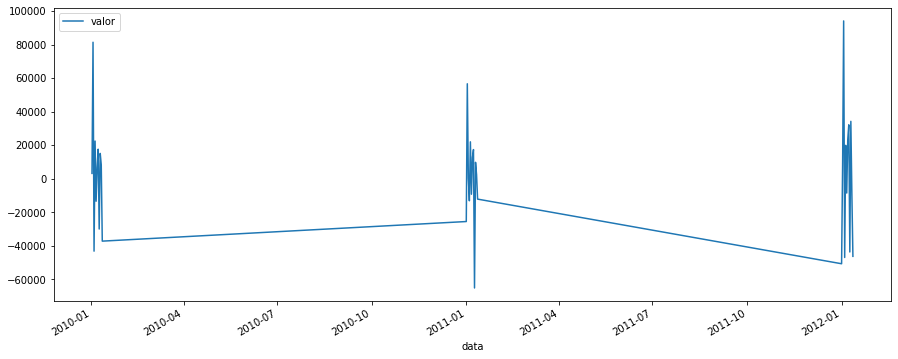

In [18]:
# como a série temporal é muito grande, fica difícil de fazer uma análise de sazonalidade.Dessa forma vamos fazer um filtro no dados
filtro = (df.index.year >= 2010) & (df.index.year <=2012)
df[filtro].diff().plot(figsize=(15,6));

Vemos no gráfico acima que a produção de veículos sempre é maior no mês de janeiro de cada ano.

## Análise de tendência(12 meses)

In [19]:
# função para plotar uma série e sua média móvel 12 meses.

def plot_mediamovel(timeseries):

  rolmean = timeseries.rolling(12).mean()

  plt.figure(figsize=(15,6))
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='média móvel 12 meses')
  plt.legend(loc='best')
  plt.title('valor original e média móvel dos 12 meses')
  plt.show(block=False)

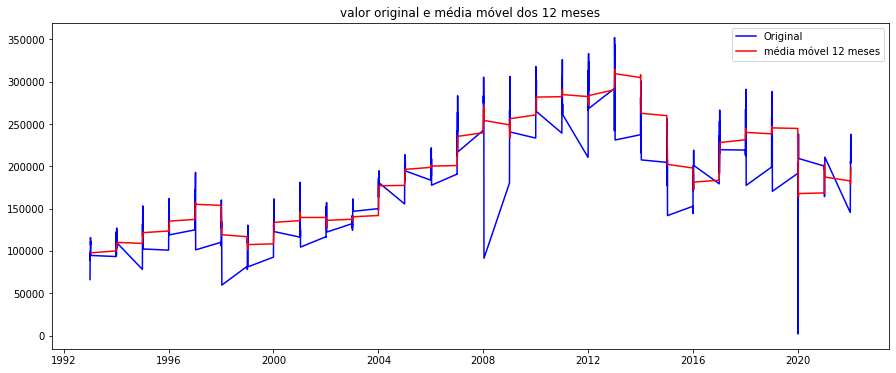

In [20]:
# plotar gráfico de média mmóvel
plot_mediamovel(df)

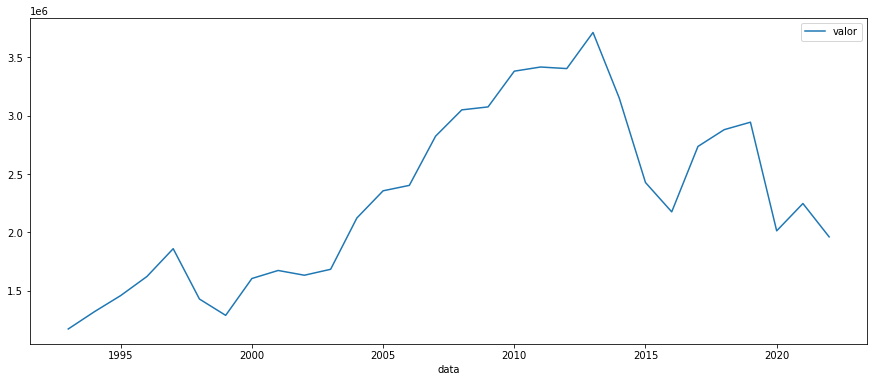

In [21]:
# média móvel usando groupby
df.groupby(df.index.year).sum().plot(figsize=(15,6));

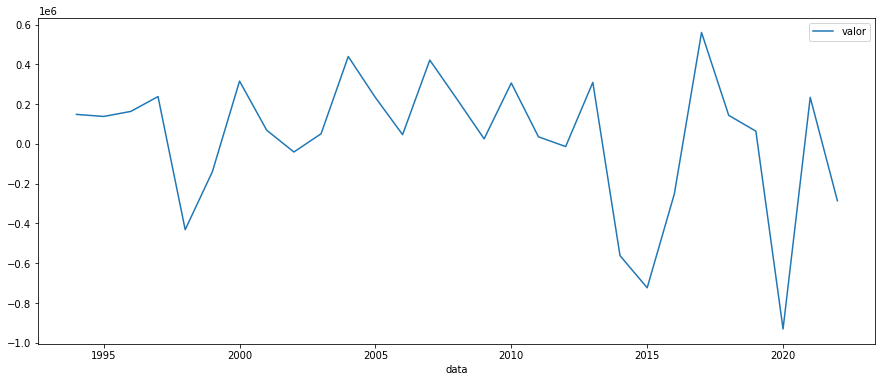

In [22]:
# somando o total de vendas por ano e plotando o gráfico
df.groupby(df.index.year).sum().diff().plot(figsize=(15,6));